## Data Visualization 
### References : 
### https://matplotlib.org/3.3.0/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py
### https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/


In [2]:
from pandas import read_csv
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import datetime
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from random import seed
from random import random
from sklearn import preprocessing

C:\Users\HP\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [3]:
df = pd.read_csv('SMR_SNagar_Daily_AI.csv')
df

,Year,Month,Day,SLP,MSLP,RH,DD,FFF,AW,Max Temp,Min Temp,Rainfall
0,1969,6,1,945.7,1007.0,65.0,27.0,4.0,12.0,37.0,24.4,0.0
1,1969,6,2,945.6,1006.7,65.0,27.0,12.0,11.0,38.2,24.6,1.0
2,1969,6,3,944.5,1005.7,74.0,27.0,2.0,4.0,36.8,22.6,11.1
3,1969,6,4,942.4,1003.5,73.0,27.0,10.0,7.0,34.0,21.0,3.0
4,1969,6,5,942.6,1003.5,65.0,9.0,8.0,10.0,34.6,24.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,1985,9,26,948.7,1010.8,87.0,0.0,0.0,1.0,32.2,21.0,0.0
2070,1985,9,27,948.3,1010.4,84.0,0.0,0.0,2.0,33.9,20.8,0.4
2071,1985,9,28,948.2,1010.1,81.0,0.0,0.0,2.0,34.5,21.2,31.8
2072,1985,9,29,948.1,1010.2,88.0,0.0,0.0,0.0,32.3,22.8,1.9


In [4]:
df.dtypes

Year          int64
Month         int64
Day           int64
SLP         float64
MSLP        float64
RH          float64
DD          float64
FFF         float64
AW          float64
Max Temp    float64
Min Temp    float64
Rainfall    float64
dtype: object

In [5]:
print(df.describe())

              Year        Month          Day          SLP         MSLP  \
count  2074.000000  2074.000000  2074.000000  2063.000000  2063.000000   
mean   1977.000000     7.500000    15.754098   944.225497  1005.529423   
std       4.900161     1.110946     8.809080     2.848732    20.571812   
min    1969.000000     6.000000     1.000000   935.100000    80.000000   
25%    1973.000000     7.000000     8.000000   942.500000  1004.100000   
50%    1977.000000     7.500000    16.000000   944.200000  1005.900000   
75%    1981.000000     8.000000    23.000000   945.800000  1007.800000   
max    1985.000000     9.000000    31.000000  1002.500000  1014.200000   

                RH           DD          FFF           AW     Max Temp  \
count  2063.000000  2063.000000  2063.000000  2054.000000  2064.000000   
mean     81.620456    22.455162     7.860882     7.837877    29.200145   
std       8.094130     9.707297     5.697136     4.021073     2.709022   
min      27.000000     0.000000     0

In [6]:
#converting date from float to integer
df["Year"] = df["Year"].fillna(0)
df["Year"] = df['Year'].astype('int')
df["Month"] = df["Month"].fillna(0)
df["Month"] = df['Month'].astype('int')
df["Day"] = df["Day"].fillna(0)
df["Day"] = df['Day'].astype('int')
df['dateInt']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2)+ df['Day'].astype(str).str.zfill(2)
df['New_Date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d',errors='coerce')

In [7]:
df = df.set_index('New_Date')
df.head(3)

,Year,Month,Day,SLP,MSLP,RH,DD,FFF,AW,Max Temp,Min Temp,Rainfall,dateInt
New_Date,,,,,,,,,,,,,
1969-06-01,1969,6,1,945.7,1007.0,65.0,27.0,4.0,12.0,37.0,24.4,0.0,19690601
1969-06-02,1969,6,2,945.6,1006.7,65.0,27.0,12.0,11.0,38.2,24.6,1.0,19690602
1969-06-03,1969,6,3,944.5,1005.7,74.0,27.0,2.0,4.0,36.8,22.6,11.1,19690603


In [8]:
df1=df.dropna()

In [9]:
#After removing NA fields
print(df1.describe())

              Year        Month          Day          SLP         MSLP  \
count  2041.000000  2041.000000  2041.000000  2041.000000  2041.000000   
mean   1976.958844     7.499755    15.799118   944.190838  1005.970897   
std       4.906805     1.110611     8.794708     2.545769     2.755251   
min    1969.000000     6.000000     1.000000   935.100000   996.400000   
25%    1973.000000     7.000000     8.000000   942.500000  1004.100000   
50%    1977.000000     7.000000    16.000000   944.200000  1005.900000   
75%    1981.000000     8.000000    23.000000   945.800000  1007.800000   
max    1985.000000     9.000000    31.000000   952.000000  1014.200000   

                RH           DD          FFF           AW     Max Temp  \
count  2041.000000  2041.000000  2041.000000  2041.000000  2041.000000   
mean     81.623224    22.488486     7.886820     7.830475    29.196423   
std       8.002857     9.678407     5.705383     4.023786     2.708120   
min      45.000000     0.000000     0

## Visualize variables / fields before normalizing
### Line graph 

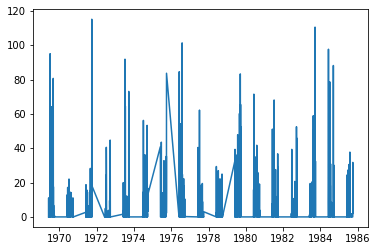

In [10]:
# Simple graph of Rainfall over the years
# Default is blue colour line
plt.plot(df1['Rainfall'])
plt.show()

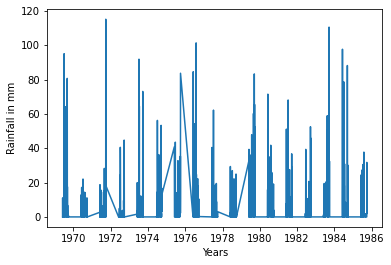

In [11]:
# Simple graph of Rainfall over the years
plt.plot(df1['Rainfall'])
plt.ylabel('Rainfall in mm')
plt.xlabel('Years')
plt.show()

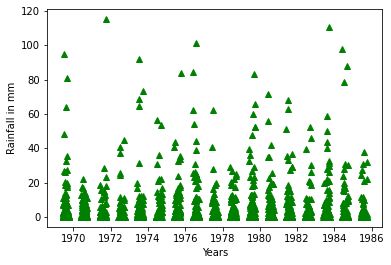

In [14]:
# Simple graph of Rainfall over the years
t= (df1['Rainfall'])
# red dashes, blue squares and green triangles
#plt.plot(t, 'r--')
plt.show()
plt.ylabel('Rainfall in mm')
plt.xlabel('Years')
#plt.plot(t, 'bs')
plt.plot(t, 'g^')
#plt.show()


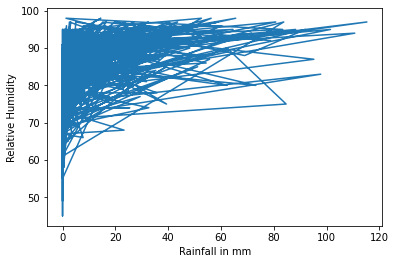

In [15]:
# Mention X vs Y
plt.plot(df1['Rainfall'], df1['RH'])
plt.ylabel('Relative Humidity')
plt.xlabel('Rainfall in mm')
plt.show()

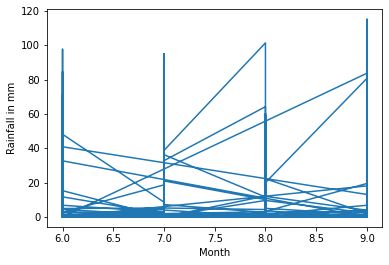

In [16]:
# Mention X vs Y : Makes more sense to plot w.r.t. temporal variable.
plt.plot(df1['Month'],df1['Rainfall'])
plt.ylabel('Rainfall in mm')
plt.xlabel('Month')
plt.show()

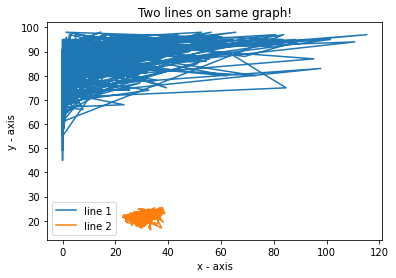

In [17]:
x1 = df1['Rainfall'] 
y1 = df1['RH'] 
# plotting the line 1 points  
plt.plot(x1, y1, label = "line 1") 

x2 =  df1['Max Temp'] 
y2 = df1['Min Temp']  
# plotting the line 2 points  
plt.plot(x2, y2, label = "line 2") 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('Two lines on same graph!') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

## Bar Chart

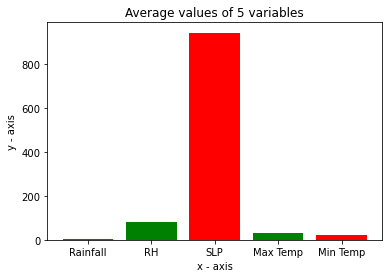

In [66]:
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5] 

h1=df1['Rainfall'].mean()
h2=df1['RH'].mean()
h3=df1['SLP'].mean()
h4=df1['Max Temp'].mean()
h5=df1['Min Temp'].mean()

# heights of bars 
height = [h1,h2,h3,h4,h5] 
  
# labels for bars 
tick_label = ['Rainfall', 'RH', 'SLP', 'Max Temp', 'Min Temp'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green']) 
  
# naming the x-axis 
plt.xlabel('x - axis') 
# naming the y-axis 
plt.ylabel('y - axis') 
# plot title 
plt.title('Average values of 5 variables') 
  
# function to show the plot 
plt.show() 

## Scatter plot

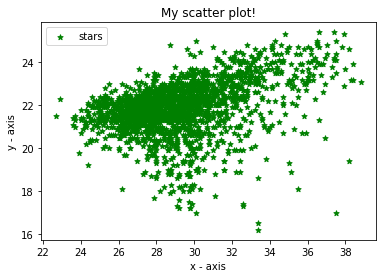

In [18]:
# x-axis values 
x = df1['Max Temp']
# y-axis values 
y = df1['Min Temp'] 
  
# plotting points as a scatter plot 
plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=30) 
  
# x-axis label 
plt.xlabel('x - axis') 
# frequency label 
plt.ylabel('y - axis') 
# plot title 
plt.title('My scatter plot!') 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show() 

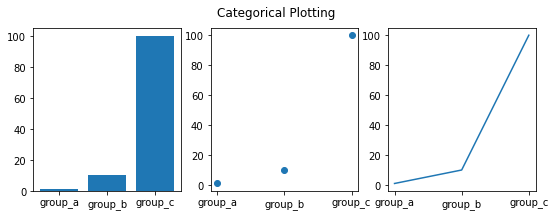

In [34]:
# Plotting with categorical variables
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Histogram

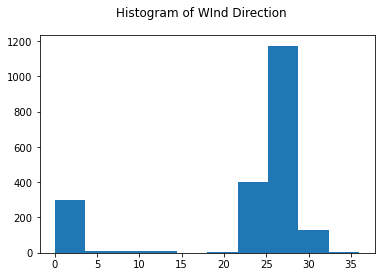

In [19]:
# Plotting categorical variables
Wind_Dir = df1['DD']
plt.hist(Wind_Dir)
plt.suptitle('Histogram of WInd Direction')
plt.show()

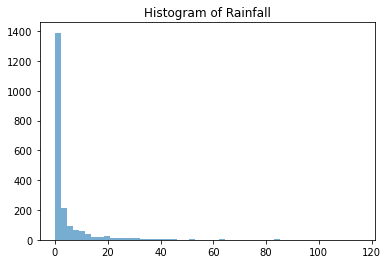

In [25]:
Rainfall = df1['Rainfall']
#plt.hist(Rainfall)
#plt.hist(Rainfall, bins=30)
plt.hist(Rainfall, bins=50, alpha=0.6)
plt.title('Histogram of Rainfall')
plt.show()

(array([ 1.,  0.,  2.,  1.,  4.,  1.,  5.,  9., 14., 14., 20., 26., 35.,
        37., 47., 39., 61., 47., 61., 66., 67., 83., 76., 40., 48., 41.,
        35., 26., 28., 18., 10., 12.,  6.,  6.,  7.,  0.,  0.,  3.,  3.,
         1.]),
 array([-3.57545796, -3.24732036, -2.91918275, -2.59104515, -2.26290755,
        -1.93476994, -1.60663234, -1.27849473, -0.95035713, -0.62221953,
        -0.29408192,  0.03405568,  0.36219329,  0.69033089,  1.01846849,
         1.3466061 ,  1.6747437 ,  2.00288131,  2.33101891,  2.65915652,
         2.98729412,  3.31543172,  3.64356933,  3.97170693,  4.29984454,
         4.62798214,  4.95611974,  5.28425735,  5.61239495,  5.94053256,
         6.26867016,  6.59680776,  6.92494537,  7.25308297,  7.58122058,
         7.90935818,  8.23749578,  8.56563339,  8.89377099,  9.2219086 ,
         9.5500462 ]),
 [<matplotlib.patches.Polygon at 0x192e5f2ae08>])

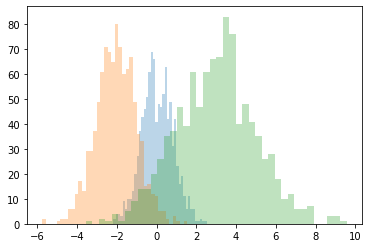

In [26]:
#plt.hist(df1['DD'], bins=40, alpha=0.5,
 #        histtype='stepfilled', color='steelblue',
  #       edgecolor='none')

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

C:\Users\HP\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Easy as 1, 2, 3')

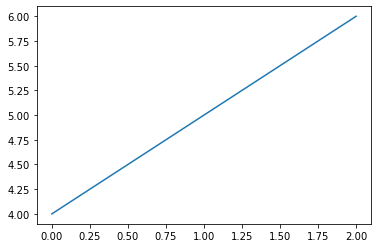

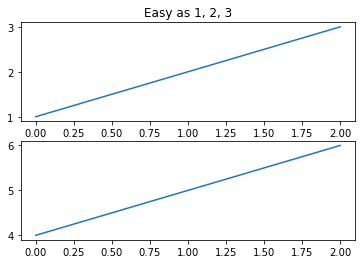

In [38]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

## Plotting multiple variables in a single graph as subplots

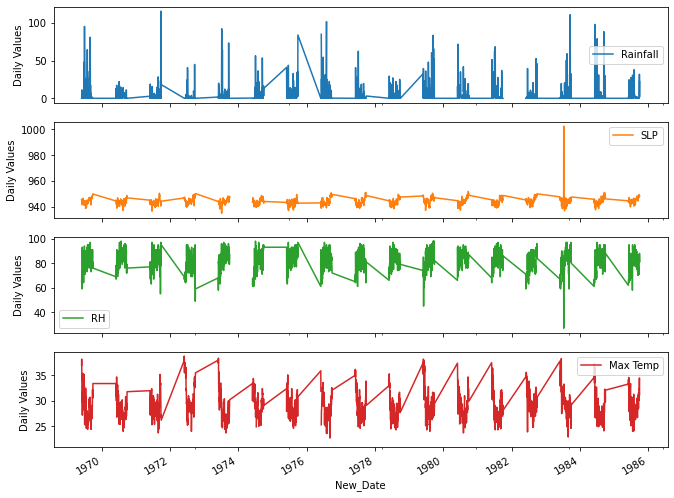

In [27]:
# Multiple variables in a single graph 
cols_plot = ['Rainfall', 'SLP', 'RH','Max Temp']
axes = df[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Values')

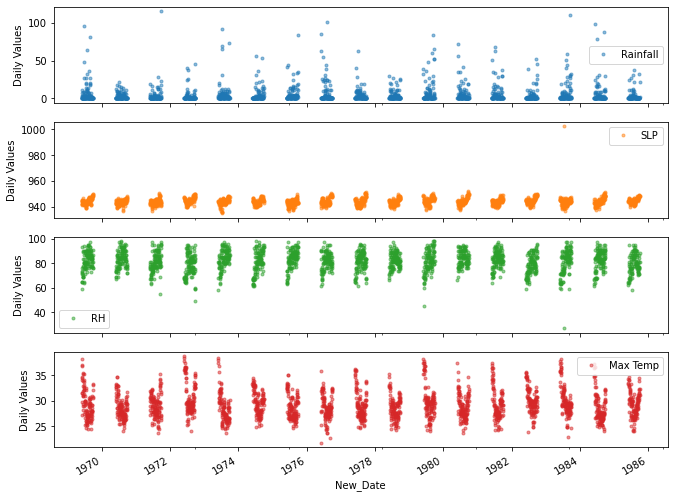

In [28]:
cols_plot = ['Rainfall', 'SLP', 'RH','Max Temp']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Values')

## Pie chart

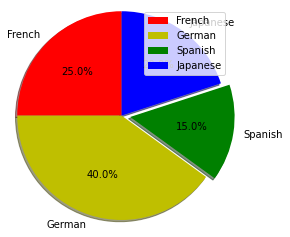

In [29]:
# defining labels 
Electives = ['French', 'German', 'Spanish', 'Japanese'] 
  
# portion covered by each label 
slices = [5, 8, 3, 4] 
  
# color for each label 
colors = ['r', 'y', 'g', 'b'] 
  
# plotting the pie chart 
plt.pie(slices, labels = Electives, colors=colors,  
        startangle=90, shadow = True, explode = (0, 0, 0.1, 0), 
        radius = 1.2, autopct = '%1.1f%%') 
  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show() 

## For Cartogram
#### https://geopandas.readthedocs.io/en/latest/gallery/plotting_with_geoplot.html

In [9]:
# Normalization with zero mean and unit standard deviation
Norm_cols = ['SLP','MSLP','RH','FFF','AW','Max Temp','Min Temp', 'Rainfall']
df1[Norm_cols] = df1[Norm_cols].apply(lambda x: (x - x.mean()) / (x.var()))

C:\Users\HP\Anaconda3\envs\tensor\lib\site-packages\pandas\core\frame.py:3062: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
df1

,Year,Month,Day,SLP,MSLP,RH,DD,FFF,AW,Max Temp,Min Temp,Rainfall,dateInt
New_Date,,,,,,,,,,,,,
1969-06-01,1969,6,1,0.232862,0.135562,-0.259552,27.0,-0.119406,0.257523,1.064040,1.680395,-0.036109,19690601
1969-06-02,1969,6,2,0.217432,0.096043,-0.259552,27.0,0.126360,0.195760,1.227663,1.812690,-0.028374,19690602
1969-06-03,1969,6,3,0.047703,-0.035685,-0.119028,27.0,-0.180847,-0.236583,1.036769,0.489738,0.049759,19690603
1969-06-04,1969,6,4,-0.276324,-0.325486,-0.134642,27.0,0.064918,-0.051293,0.654981,-0.568623,-0.012902,19690604
1969-06-05,1969,6,5,-0.245464,-0.325486,-0.259552,9.0,0.003477,0.133997,0.736793,1.944985,-0.036109,19690605
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985-09-26,1985,9,26,0.695757,0.636128,0.083952,0.0,-0.242288,-0.421872,0.409546,-0.568623,-0.036109,19850926
1985-09-27,1985,9,27,0.634038,0.583436,0.037111,0.0,-0.242288,-0.360109,0.641346,-0.700918,-0.033015,19850927
1985-09-28,1985,9,28,0.618608,0.543918,-0.009731,0.0,-0.242288,-0.360109,0.723158,-0.436328,0.209893,19850928


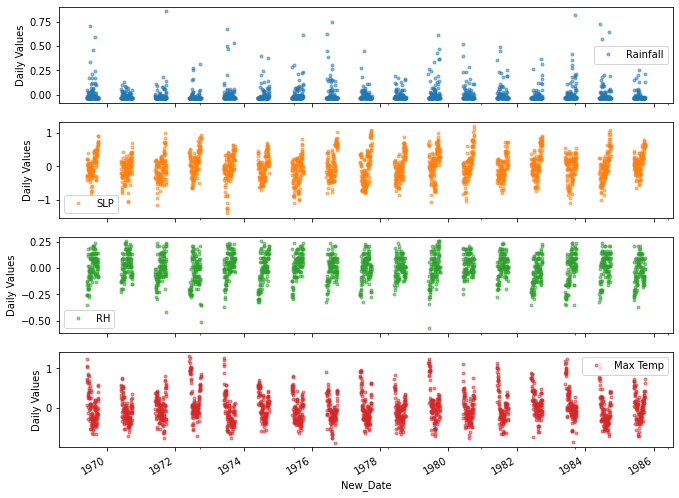

In [13]:
cols_plot = ['Rainfall', 'SLP', 'RH','Max Temp']
axes = df1[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Values')